In [12]:
import numpy as np
from orbit.audio.utils import read_wav_wave
from silero_vad import load_silero_vad, get_speech_timestamps
import matplotlib.pyplot as plt

In [6]:
SAMPLING_RATE=16000

In [7]:
model = load_silero_vad()

In [18]:
wav_file = "/Users/mischa/Projects/AEC/no_ref_record.wav/untitled.wav"
fs, samples = read_wav_wave(wav_file)



Reading '/Users/mischa/Projects/AEC/no_ref_record.wav/untitled.wav'...
Channels: 6, Sample Width: 2 bytes, Sample Rate: 16000 Hz, Frames: 214640


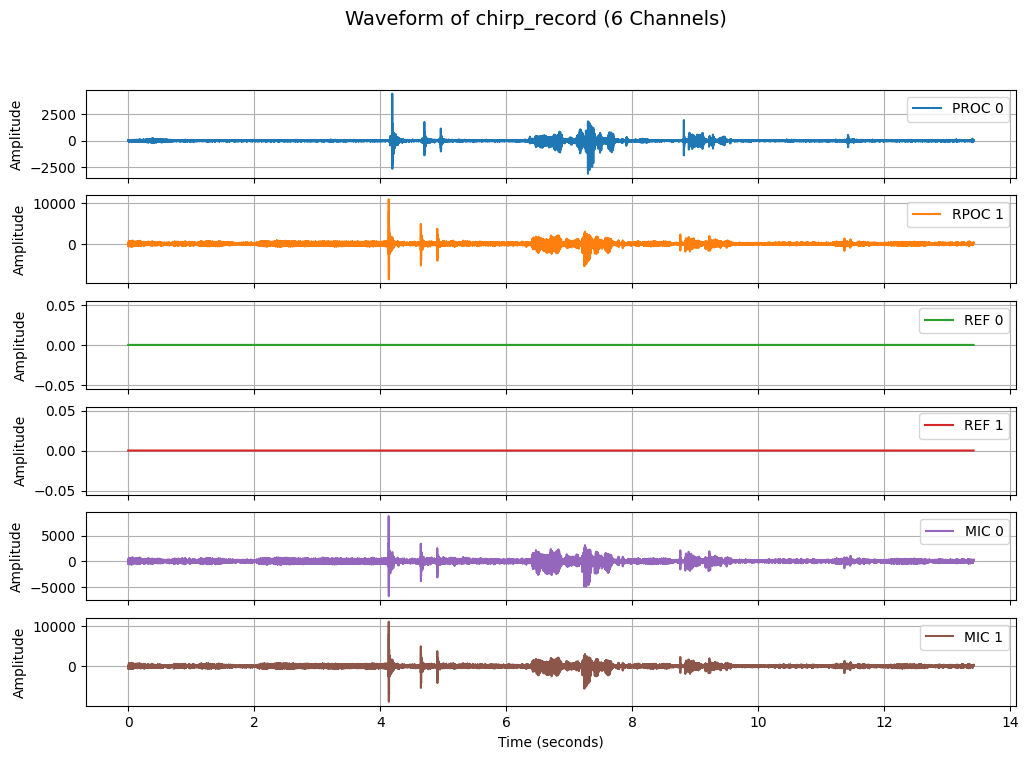

In [19]:
audio_data = samples
channel_names = [
    "PROC 0",
    "RPOC 1",
    "REF 0",
    "REF 1",
    "MIC 0",
    "MIC 1"
]
num_samples, num_channels = audio_data.shape if len(audio_data.shape) > 1 else (len(audio_data), 1)

# Create time axis
time_axis = np.linspace(0, num_samples / fs, num=num_samples)

# Limit to first 6 channels for plotting
num_channels_to_plot = min(num_channels, 6)

# Create subplots
fig, axes = plt.subplots(num_channels_to_plot, 1, figsize=(12, 8), sharex=True)
fig.suptitle(f"Waveform of chirp_record ({num_channels} Channels)", fontsize=14)

if num_channels_to_plot == 1:
    axes = [axes]  # Ensure axes is iterable for mono files

# Plot each channel separately
for i in range(num_channels_to_plot):
    axes[i].plot(time_axis, audio_data[:, i], label=f"{channel_names[i]}", color=f"C{i}")
    axes[i].set_ylabel("Amplitude")
    axes[i].legend(loc="upper right")
    axes[i].grid(True)

# Set common labels
axes[-1].set_xlabel("Time (seconds)")

plt.show()

min_speech_duration_ms: int (default - 250 milliseconds)
        Final speech chunks shorter min_speech_duration_ms are thrown out

    max_speech_duration_s: int (default -  inf)
        Maximum duration of speech chunks in seconds
        Chunks longer than max_speech_duration_s will be split at the timestamp of the last silence that lasts more than 100ms (if any), to prevent agressive cutting.
        Otherwise, they will be split aggressively just before max_speech_duration_s.

    min_silence_duration_ms: int (default - 100 milliseconds)
        In the end of each speech chunk wait for min_silence_duration_ms before separating it

    speech_pad_ms: int (default - 30 milliseconds)
        Final speech chunks are padded by speech_pad_ms each side

neg_threshold: float (default = threshold - 0.15)
        Negative threshold (noise or exit threshold). If model's current state is SPEECH, values BELOW this value are considered as NON-SPEECH.

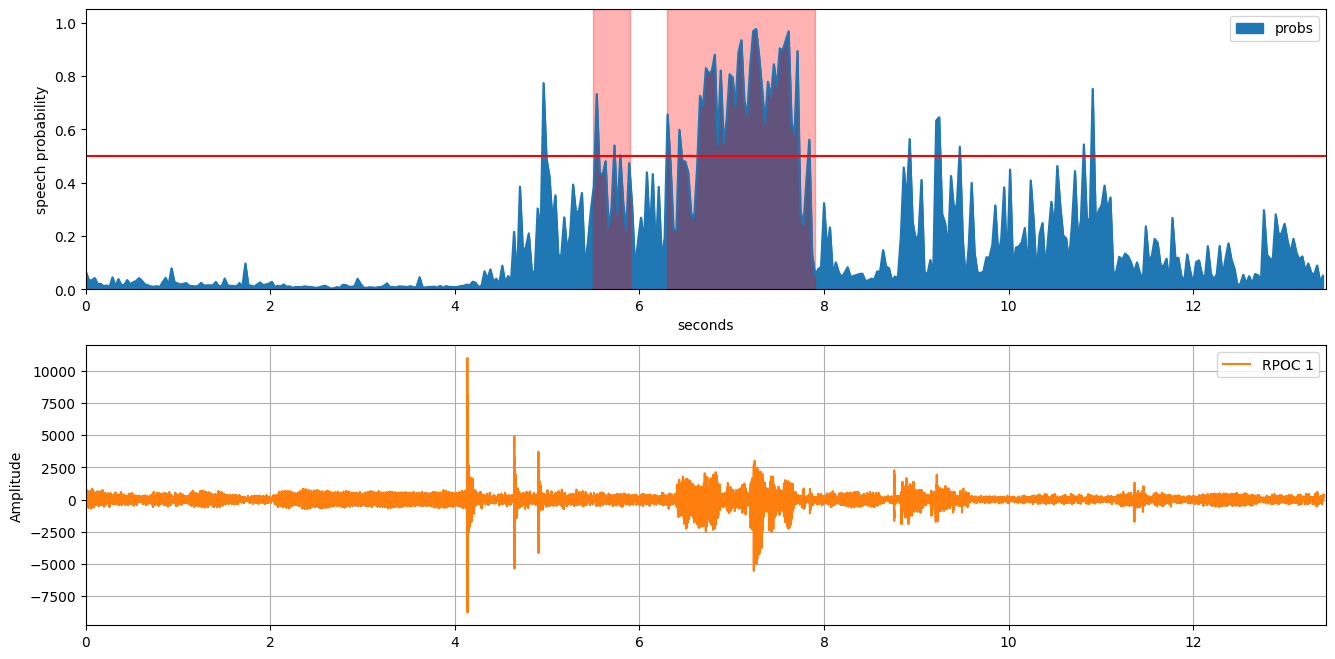

In [62]:
CHANNEL = 1
options= {
    "threshold" : 0.5,
    "min_speech_duration_ms" : 1000,
    "min_speech_duration_ms" : 250,
    "max_speech_duration_s" : float('inf'),
    "min_silence_duration_ms" : 100,
    "speech_pad_ms" : 30,
    "neg_threshold" : None
}

speech_timestamps = get_speech_timestamps( samples[:,CHANNEL], model, sampling_rate=SAMPLING_RATE, visualize_probs=True, return_seconds=True, **options)
plt.axhline( options["threshold"], color="red")
for region in speech_timestamps:
    plt.axvspan(region["start"], region["end"] , color="red", alpha=0.3, label="Highlighted Region")

curr_ax = plt.gca()
new_ax = plt.subplot(2,1,1)
curr_ax.set_position(new_ax.get_position())
new_ax.remove()
#plt.gcf().set_size_inches((16,16))
#fig = plt.figure(figsize=(12,4));
plt.subplot(2,1,2)
plt.plot(time_axis, audio_data[:, CHANNEL], label=f"{channel_names[CHANNEL]}", color=f"C{CHANNEL}")
plt.ylabel("Amplitude")
plt.legend(loc="upper right")
plt.xlim( curr_ax.get_xlim() )
plt.grid(True)
